In [1]:
# 구글 계정 액세스
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
tf.__version__

import matplotlib

???_과제번호(79)_질병(0/1)_질병코드(흰가루병20)_작물코드(호박10)_촬영부위코드(잎 03)_작물생육코드(생장기 12)_해충피해코드(정상0 초기1 중기2 말기3)

In [ ]:
# # 이미지 불러오기
# import os

# path = "/content/drive/MyDrive/Colab/Add_Plants"
# image_list = os.listdir(path)
# image_list_png = [image for image in image_list if image.endswith(".png")]

# print('image_list_png :{}'.format(image_list_png))

image_list_png :[]


In [ ]:
# # 이미지 불러오기
# import PIL
# import glob

# imgs = glob.glob('/content/drive/MyDrive/Colab/Add_Plants/*.png')

# for img in imgs:
#     try:
#         img = PIL.Image.open(img)
#     except PIL.UnidentifiedImageError:
#         print(img)

In [ ]:
# # 클래스별 갯수 
# import os, shutil
# original_dataset_dir = '/content/drive/MyDrive/Colab/Add_Plants/'

# folder_list = []
# for path_ in os.listdir(original_dataset_dir):
#     if path_.startswith('.'):
#         pass
#     else:
#         path2 = original_dataset_dir + path_
#         folder_list.append(path_)
        
# print(folder_list)

# plant_cnt = {}
# for path in folder_list:
#     plant_cnt[path] = len(os.listdir(original_dataset_dir+path))
    
# print(plant_cnt)

['ivy', 'wilma', 'hongkong', 'gaewoonjuk', 'skindapsus', 'hangwoonmok', 'sansevieria', 'sanhosoo', 'orangejasmin', 'benghaltree', 'rosmari']
{'ivy': 983, 'wilma': 1526, 'hongkong': 1431, 'gaewoonjuk': 1559, 'skindapsus': 1368, 'hangwoonmok': 1254, 'sansevieria': 1168, 'sanhosoo': 1000, 'orangejasmin': 1486, 'benghaltree': 1683, 'rosmari': 1328}


In [12]:
# # datasets 파일 만들기
# base_dir = '/content/drive/MyDrive/Colab/res50/' 
# os.mkdir(base_dir)
# # datasets 파일 안에 Plant 파일 만들기
base_dir = '/content/drive/MyDrive/Colab/res50/Plant' # 소규모 데이터셋 저장할 디렉토리
# os.mkdir(base_dir)

In [13]:
# # # 훈련, 검증, 테스트 폴더 만들기
# train_dir = os.path.join(base_dir, 'train')
# valid_dir = os.path.join(base_dir, 'valid')
# test_dir = os.path.join(base_dir, 'test')
# # 
# # os.mkdir(train_dir)
# # os.mkdir(valid_dir)
# # os.mkdir(test_dir)

In [ ]:
# # 이미지 데이터 이름 변경 (순서매기기) -> 지금 all파일에 순서 정리 다 돼있어서 또 돌리면 데이터 손실있음!

# for path in folder_list:
#     i = 1
#     for imgPath in os.listdir(original_dataset_dir+path):
#         src = os.path.join(original_dataset_dir+path, imgPath)
#         dst_ = path + '_' + str(i) + '.png'
#         dst = os.path.join(original_dataset_dir+path, dst_)
        
#         print(src)
#         print(dst)
#         print('-' * 40)
        
#         os.rename(src, dst)
#         i += 1

In [ ]:
# # 안열리는 파일 삭제 
# import PIL, glob
# from PIL import Image
# from os import remove

# datalist = ['train', 'test', 'valid']

# for data in datalist : 
#     imgs_ = glob.glob(f"/content/drive/MyDrive/Colab/add/Plant/{data}/*/*.png")

#     for img in imgs_:
#         try:
#             img = PIL.Image.open(img)
#         except PIL.UnidentifiedImageError:
#             print(img)
#             remove(img)

In [ ]:
# # 데이터 나누기
# data_list = [train_dir, valid_dir, test_dir]

# for dataset in data_list:
#     print('dataset : ',dataset)
#     for plant in plant_cnt:
#         filePath_ = os.path.join(dataset, plant)
#         os.mkdir(filePath_)

#         # 데이터 개수의 반틈 train 폴더에 복사
#         if dataset == data_list[0]:
#             cnt = int(int(plant_cnt[plant])/2)
#             fnames = ['{}_{}.png'.format(plant, i+1) for i in range(0,cnt)]
#             print(cnt)
#             print(plant,'- train_dir len :', len(fnames))
        
#         elif dataset == data_list[1]:
#             cnt = int(int(plant_cnt[plant])/2)
#             cnt3 = int((int(plant_cnt[plant])/4)*3)
#             fnames = ['{}_{}.png'.format(plant, i+1) for i in range(cnt,cnt3)]
#             print(plant,'- valid_dir len :', len(fnames))
#             print("fnames : ",fnames)
#         else :
#             cnt3 = int((int(plant_cnt[plant])/4)*3)
#             fnames = ['{}_{}.png'.format(plant, i+1) for i in range(cnt3,plant_cnt[plant])]
#             print(plant, '-test_dir len :', len(fnames))
            
#         for fname in fnames:
#             src = os.path.join(original_dataset_dir,plant)
#             src2 = os.path.join(src,fname)
#             dst = os.path.join(filePath_,fname)
# #             print(src2)
#             print('dst :',dst)
#             shutil.copyfile(src2,dst)

In [14]:
# dir_path = '/content/drive/MyDrive/Colab/res50/Plant/train/'
# plants_cnt = os.listdir(dir_path)
# print(os.listdir(dir_path))

['benghaltree', 'yeoincho', 'stuckyi', 'monstera', 'tableyaja', 'geumjeonsoo', 'ivy', 'wilma', 'hongkong', 'gaewoonjuk', 'skindapsus', 'hangwoonmok', 'sansevieria', 'sanhosoo', 'orangejasmin', 'rosmari']


In [15]:
# l = []
# for plant in plants_cnt:
#     path_train = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/train',plant)
#     print(plant)
#     a = len(os.listdir(path_train))
#     print('훈련용 이미지 개수 : ', a)

#     path_valid = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/valid',plant)
#     b = len(os.listdir(path_valid))
#     print('valid 이미지 개수 : ', b)

#     path_test = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/test',plant)
#     c = len(os.listdir(path_test))
#     print('test 이미지 개수 : ', c)
#     d = a+b+c
#     print('총합계 : ', d)
#     print('-' * 40)
#     l.append(d)
# print(sum(l))

benghaltree
훈련용 이미지 개수 :  841
valid 이미지 개수 :  420
test 이미지 개수 :  421
총합계 :  1682
----------------------------------------
yeoincho
훈련용 이미지 개수 :  698
valid 이미지 개수 :  349
test 이미지 개수 :  350
총합계 :  1397
----------------------------------------
stuckyi
훈련용 이미지 개수 :  730
valid 이미지 개수 :  365
test 이미지 개수 :  365
총합계 :  1460
----------------------------------------
monstera
훈련용 이미지 개수 :  832
valid 이미지 개수 :  416
test 이미지 개수 :  417
총합계 :  1665
----------------------------------------
tableyaja
훈련용 이미지 개수 :  495
valid 이미지 개수 :  247
test 이미지 개수 :  248
총합계 :  990
----------------------------------------
geumjeonsoo
훈련용 이미지 개수 :  754
valid 이미지 개수 :  377
test 이미지 개수 :  377
총합계 :  1508
----------------------------------------
ivy
훈련용 이미지 개수 :  491
valid 이미지 개수 :  246
test 이미지 개수 :  246
총합계 :  983
----------------------------------------
wilma
훈련용 이미지 개수 :  763
valid 이미지 개수 :  381
test 이미지 개수 :  382
총합계 :  1526
----------------------------------------
hongkong
훈련용 이미지 개수 :  715
valid 이미지 개수 :  358
test 

In [3]:
# 학습, 검증, 테스트셋과 연결
import PIL
import glob
import os, shutil
from PIL import Image

train_dir = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/train')
valid_dir = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/valid')
test_dir = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/test')

In [ ]:
# imgs_ = glob.glob("/content/drive/MyDrive/Colab/res50/Plant/*/*/*")
# print(imgs_)

['/content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_1.png', '/content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_2.png', '/content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_3.png', '/content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_4.png', '/content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_6.png', '/content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_5.png', '/content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_10.png', '/content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_8.png', '/content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_16.png', '/content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_7.png', '/content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_12.png', '/content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_14.png', '/content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_11.png', '/content/drive/MyDrive/Colab/re

In [ ]:
# # 경로를 다 빼고 이미지만 가지고 오기
# import os, shutil
# img_list = []
# for i in range(len(imgs_)):
#   imgs = os.path.basename(imgs_[i])
#   img_list.append(imgs)
# print(img_list)

['yeoincho_1.png', 'yeoincho_2.png', 'yeoincho_3.png', 'yeoincho_4.png', 'yeoincho_6.png', 'yeoincho_5.png', 'yeoincho_10.png', 'yeoincho_8.png', 'yeoincho_16.png', 'yeoincho_7.png', 'yeoincho_12.png', 'yeoincho_14.png', 'yeoincho_11.png', 'yeoincho_15.png', 'yeoincho_9.png', 'yeoincho_13.png', 'yeoincho_17.png', 'yeoincho_20.png', 'yeoincho_19.png', 'yeoincho_18.png', 'yeoincho_22.png', 'yeoincho_23.png', 'yeoincho_26.png', 'yeoincho_21.png', 'yeoincho_24.png', 'yeoincho_25.png', 'yeoincho_27.png', 'yeoincho_28.png', 'yeoincho_30.png', 'yeoincho_29.png', 'yeoincho_31.png', 'yeoincho_32.png', 'yeoincho_37.png', 'yeoincho_33.png', 'yeoincho_36.png', 'yeoincho_35.png', 'yeoincho_34.png', 'yeoincho_38.png', 'yeoincho_39.png', 'yeoincho_44.png', 'yeoincho_43.png', 'yeoincho_47.png', 'yeoincho_45.png', 'yeoincho_42.png', 'yeoincho_46.png', 'yeoincho_40.png', 'yeoincho_48.png', 'yeoincho_41.png', 'yeoincho_49.png', 'yeoincho_50.png', 'yeoincho_51.png', 'yeoincho_55.png', 'yeoincho_54.png', '

In [ ]:
# os.chdir('/content/drive/MyDrive/Colab/res50/Plant')

In [ ]:
# for img in imgs_:
#   pic = open(img)
#   print(pic)

In [ ]:
# print(pic)

<_io.TextIOWrapper name='/content/drive/MyDrive/Colab/res50/Plant/test/rosmari/rosmari_1328.png' mode='r' encoding='UTF-8'>


In [ ]:
# image = Image.open(img)
# # [Errno 2] No such file or directory: 'rosmari_1328.png' 지우고 다시 돌려보자!
# # 지워도 [Errno 2] No such file or directory: 'rosmari_1327.png' 이 에러가 뜸..

In [ ]:
# # 안열리는 파일 삭제 
# import PIL, glob
# from PIL import Image
# from os import remove

# for img in imgs_:
#     try:
#         image = Image.open(img)
#     except PIL.UnidentifiedImageError:
#         print(image)
#         remove(image)

In [ ]:
# ## opencv로 불러와서 다시 저장하기
# import cv2
# import PIL, glob
# from tqdm import tqdm ## for문에서 걸리는 시간 보여주는 라이브러리

# for img in tqdm(imgs):
#     try:
#         src = cv2.imread(img, cv2.IMREAD_UNCHANGED)
#         cv2.imwrite(img, src)

#     except PIL.UnidentifiedImageError:
#         print(img)
#         cv2.imwrite(img, src)

# # opencv로 파일 열어서 다시 저장하기 
# # 오류 해결 가능 => UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f9e185347d0> 


In [4]:
# 모델 구성
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers

from keras.models import Model
from keras.layers import Input, Dense
from tensorflow.keras import Input
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.layers import BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, Input, activations, optimizers

import scipy
import matplotlib.pyplot as plt

In [5]:
# ResNet50 model 불러오기 
# 컬러 이미지 이므로 3채널!
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(include_top=False, input_shape =(224,224, 3), weights = 'imagenet')
base_model.summary()

94781440/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [6]:
# ResNet50 전이학습 
base_model.trainable = False

## 모델 layer 설계
input = Input(shape=(224,224,3))
x = tf.keras.layers.experimental.preprocessing.Resizing(224,224)(input)
# x = tf.keras.layers.experimental.preprocessing.CenterCrop(224,224)(x)
x = tf.keras.applications.resnet50.preprocess_input(x)
x = base_model(x, training = False)
x = Flatten()(x)   # Fully Connected에 온전하게 학습을 위해 펼쳐준다 

# x = Dense(256, activation = 'relu')(x)
outputs = Dense(16, activation = 'softmax')(x) # Softmax 함수로 5개 분류

model_res = tf.keras.Model(input, outputs) # model_res 란 이름의 인풋과 아웃풋이 정해진 모델 생성

# 모델 확인
model_res.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                             

- input_tensor : 입렵으로 받는 형태. 여기서는 224 by 224크기에 각 rgb채널 3의 shape이다.
- include_top : 가장 상단의 fully connected계층들을 포함 시킬지의 여부다.
- weight : 케라스에서 미리 pretraining 시켜놓은 weight을 사용 할 것인지 여부다.
- pooling : top layer를 포함시키지 않았을때 가장 상단부분의(직관적으로 봤을 때는 하단이지만...)max, avr pooling 방법을 셋팅 할 수 있다.
- include_top = False로 했을 때 fc계층이 없음.
- transfer learning같이 fc계층들만 트레이닝이 되고 있다면 아무 훈련되지 않은 weight값들로 생성된 feature들 만으로 이같은 accuracy가 나오지 않을 것이다.


In [7]:
# 컴파일
model_res.compile(loss = 'categorical_crossentropy',  # categorical_crossentropy 사용은 label이 숫자형 데이터일때
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),  # RMSprop : 기울기를 단순 누적하지 않고 지수 가중 이동 평균 Exponentially weighted moving average 를 사용하여 최신 기울기들이 더 크게 반영되도록 하였다
             metrics = ['acc'])

In [8]:
# model_res.compile(loss = 'sparse_categorical_crossentropy',
#              optimizer = 'adam',  # RMSprop : 기울기를 단순 누적하지 않고 지수 가중 이동 평균 Exponentially weighted moving average 를 사용하여 최신 기울기들이 더 크게 반영되도록 하였다
#              metrics = ['acc'])
# model_res.summary()

In [9]:
# 모든 이미지를 1/255로 스케일을 조정
train_datagan = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    # preprocessing_function = forward
    ) # forward 정규화 
test_datagan = ImageDataGenerator(rescale=1./255)
# , preprocessing_function = forward

In [10]:
train_generator = train_datagan.flow_from_directory(
                                            train_dir, 
                                            target_size = (224,224),
                                            batch_size=20,
                                            class_mode='categorical')

Found 10900 images belonging to 16 classes.


In [11]:
validation_generator = test_datagan.flow_from_directory(
                                            valid_dir, 
                                            target_size = (224,224),
                                            batch_size=20,
                                            class_mode='categorical')

Found 5449 images belonging to 16 classes.


In [13]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# 모델 학습 
history = model_res.fit(train_generator,
                    validation_data=validation_generator,
                    # callbacks=[early],
                    epochs=20)


Epoch 1/20
545/545 [==============================] - 11039s 20s/step - loss: 29.7849 - acc: 0.1947 - val_loss: 45.5583 - val_acc: 0.2072
Epoch 2/20
545/545 [==============================] - 181s 332ms/step - loss: 28.5468 - acc: 0.2388 - val_loss: 24.5532 - val_acc: 0.2344
Epoch 3/20
545/545 [==============================] - 180s 331ms/step - loss: 29.5257 - acc: 0.2593 - val_loss: 19.0292 - val_acc: 0.3623
Epoch 4/20
545/545 [==============================] - 180s 330ms/step - loss: 31.2553 - acc: 0.2620 - val_loss: 30.9346 - val_acc: 0.3307
Epoch 5/20
545/545 [==============================] - 180s 331ms/step - loss: 28.5639 - acc: 0.2839 - val_loss: 39.1484 - val_acc: 0.3135
Epoch 6/20
545/545 [==============================] - 179s 329ms/step - loss: 29.5922 - acc: 0.2850 - val_loss: 21.3570 - val_acc: 0.3610
Epoch 7/20
545/545 [==============================] - 180s 330ms/step - loss: 28.0478 - acc: 0.3042 - val_loss: 24.0102 - val_acc: 0.3309
Epoch 8/20
545/545 [==============

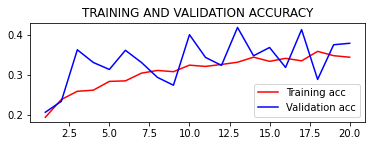

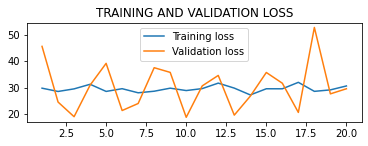

In [14]:
# 모델 과적합 확인
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)
plt.subplot(2, 1, 1)
plt.plot(epochs, acc, 'r', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label= 'Validation acc')
plt.title('TRAINING AND VALIDATION ACCURACY')
plt.legend()

plt.figure()
plt.subplot(2, 1, 2)
plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.title('TRAINING AND VALIDATION LOSS')
plt.legend()

plt.show()
# plt.savefig('/content/drive/MyDrive/Colab/model/model.png')

## sns 저장
# sfig = splot.get_figure()
# sfig.savefig('서울 전체 포함 공실률 최종.png')

In [15]:
# 모델 테스트
test_generator = test_datagan.flow_from_directory(test_dir, target_size=(224,224), batch_size=24, class_mode='categorical')
test_loss, test_acc = model_res.evaluate_generator(test_generator, steps=30)
print(f'test loss: {test_loss}, test acc: {test_acc}')

Found 5456 images belonging to 16 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


test loss: 31.431047439575195, test acc: 0.36250001192092896


In [16]:
# 모델 저장
# import tensorflow as tf
from tensorflow.keras.applications import mobilenet_v2

# model_type = 'resnet50'

saved_model_dir = '/content/drive/MyDrive/Colab/model/resnet50_fianl.h5'

model_res.save(saved_model_dir)

In [ ]:
# # torch 모델 저장
# import torch
# def save_model(model, saved_dir):
#   os.makedirs(saved_dir, exist_ok=True) # 폴더가 존재하지 않으면 디렉토리를 생성함
#   check_point = {
#       # 'net' : model.state_dict()
#       # 'optim' : optimizer.state_dict()
#       # 'loss' : loss.state_dict()
#       # 'epoch' : epoch.state_dict()
#   }
#   torch.save(check_point, saved_dir+'/resnet50.pt')

In [ ]:
# #@title
# # 코랩 껐다 켰을 때
# from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
# import numpy as np

# from tensorflow import keras
# from tensorflow.keras import optimizers

# from tensorflow.keras import Input
# import tensorflow as tf
# from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
# from tensorflow.keras.applications.resnet50 import preprocess_input

# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# import scipy
# import matplotlib.pyplot as plt

In [ ]:
# #@title
# # 저장된 모델 불러오기
# from tensorflow.keras.models import load_model

# model_res1 =load_model('/content/drive/MyDrive/Colab/model/resnet50_0506.h5')


# model_res1.summary()

In [ ]:
# #@title
# # 저장된 모델만 불러온 후 학습, 검증, 테스트셋과 연결
# import PIL
# import glob
# import os, shutil


# train_dir = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/train')
# valid_dir = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/valid')
# test_dir = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/test')

In [ ]:
# #@title
# # 모든 이미지를 1/255로 스케일을 조정
# train_datagan = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     # preprocessing_function = forward
#     ) # forward 정규화 
# test_datagan = ImageDataGenerator(rescale=1./255)
# # , preprocessing_function = forward

In [ ]:
# #@title
# # train_generator : 이미지 불러오기
# train_generator = train_datagan.flow_from_directory(
#                                             train_dir, 
#                                             target_size = (150,150),
#                                             batch_size=24,
#                                             class_mode='categorical')

In [ ]:
# #@title
# # # 이미지 불러오기
# train_generator = train_datagan.flow_from_directory(
#                                             train_dir, 
#                                             target_size = (224,224),
#                                             batch_size=20,
#                                             class_mode='categorical')

In [ ]:
# #@title
# validation_generator = test_datagan.flow_from_directory(
#                                             valid_dir, 
#                                             target_size = (224,224),
#                                             batch_size=20,
#                                             class_mode='categorical')

In [ ]:
# #@title
# early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# # 모델 학습 
# history = model_res1.fit(train_generator,
#                     validation_data=validation_generator,
#                     # callbacks=[early],
#                     epochs=20)


In [ ]:
# #@title
# # 모델 과적합 확인
# import matplotlib.pyplot as plt

# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(1, len(acc) + 1)

# plt.figure(figsize = (9, 6))
# plt.plot(epochs, acc, 'r', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and Validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.grid()
# plt.legend()

In [ ]:
# #@title
# # 모델 테스트
# test_generator = test_datagan.flow_from_directory(test_dir, target_size=(150,150), batch_size=24, class_mode='categorical')
# test_loss, test_acc = model_res1.evaluate_generator(test_generator, steps=30)
# print(f'test loss: {test_loss}, test acc: {test_acc}')

In [ ]:
# #@title
# # 모델 저장
# # import tensorflow as tf
# from tensorflow.keras.applications import mobilenet_v2

# # model_type = 'resnet50'

# saved_model_dir = '/content/drive/MyDrive/Colab/model/resnet50_final.h5'

# model_res.save(saved_model_dir)